<a href="https://colab.research.google.com/github/awildsheepchase/OpenCV/blob/main/%E6%8A%93%E5%8F%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

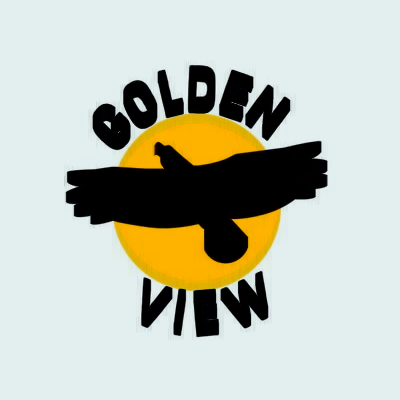

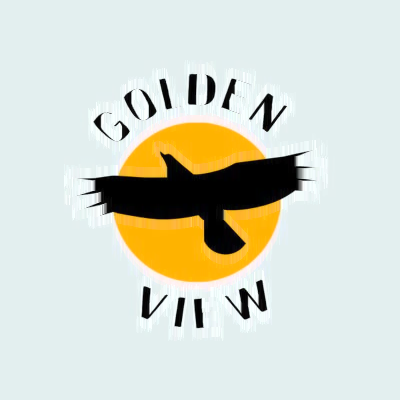

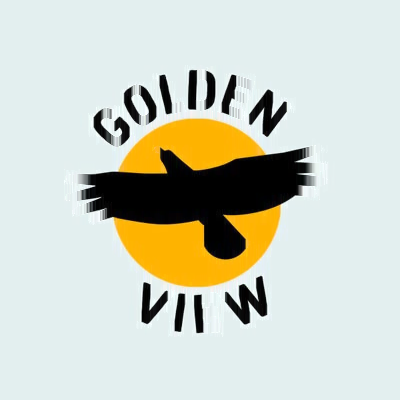

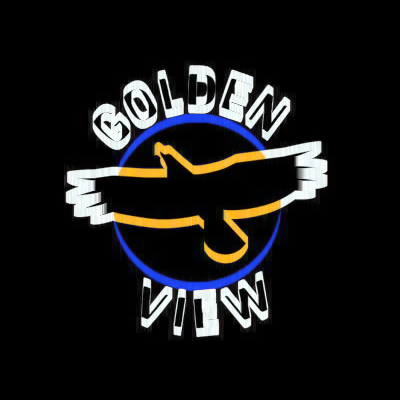

In [1]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow


m1 = cv2.imread("logo.jpg",1)
# 侵蝕（色彩值低的會侵佔色彩值高的部分）
m2 = cv2.erode(m1, np.ones((10,1)))
# 膨脹（色彩值高的會侵佔色彩值低的部分）
m3 = cv2.dilate(m1, np.ones((10,1)))

# 可利用來去除雜訊（點和線等）
m4 = cv2.morphologyEx(m1,cv2.MORPH_CLOSE,np.ones((10,1)))
# 顯示變化差也可用來偵測邊緣
m5 = cv2.morphologyEx(m1,cv2.MORPH_GRADIENT,np.ones((10,1)))


cv2_imshow(m2)
cv2_imshow(m3)
cv2_imshow(m4)
cv2_imshow(m5)

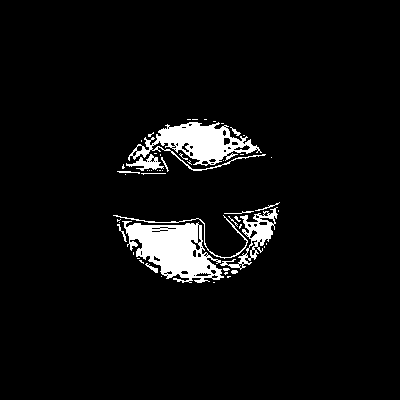

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1 = cv2.imread("logo.jpg",1)
# 例如抓黃色:先用小畫家找出黃色BGR數值
m2 = cv2.inRange(m1,(0,0,10),(0,255,255))
cv2_imshow(m2)

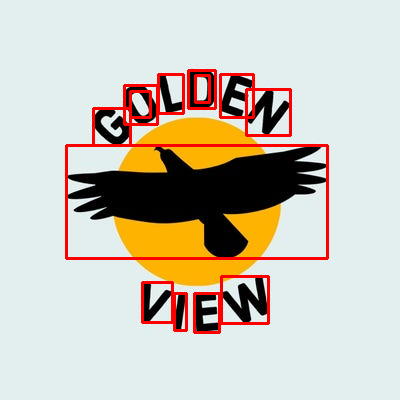

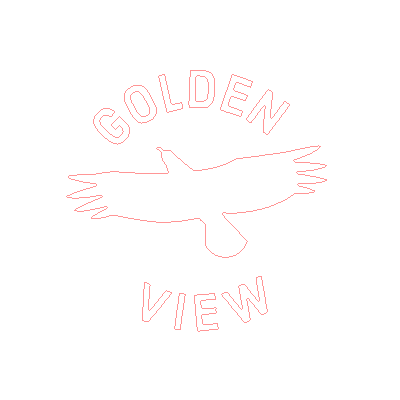

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

# 取得輪廓
# 需要先處理圖片：以黑白最好
m1 = cv2.imread("logo.jpg",1)
m2 = cv2.inRange(m1,(0,0,0),(35,35,35))
# cv2_imshow(m2)
# p 輪廓點
# t 輪廓階層資料
p,t = cv2.findContours(
    m2,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_NONE
)
# print(p)
# print(t)
# 繪製輪廓
m3 = np.full(m1.shape,(255,255,255),np.uint8)
# cv2.drawContours(m1,p,-1,(150,150,255),2)
cv2.drawContours(m3,p,-1,(150,150,255),1)
# 框選輪廓
for i in range(0,len(p),1):
    x,y,w,h = cv2.boundingRect(p[i])
    cv2.rectangle(m1,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(m1)
cv2_imshow(m3)

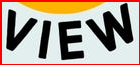

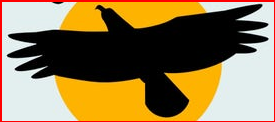

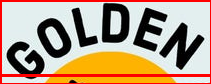

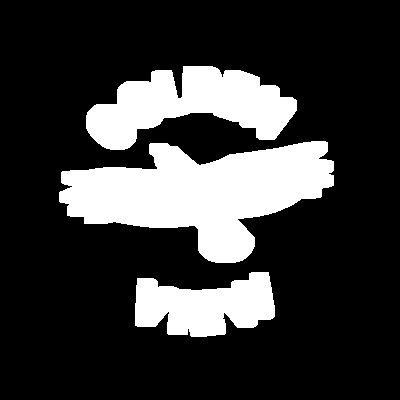

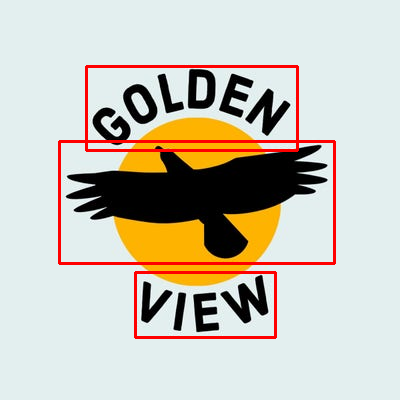

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

# 取得文字外圍輪廓，取完整字詞，因此利用侵蝕貨膨脹將字詞輪廓聚合成同一輪廓
m1 = cv2.imread("logo.jpg",1)
m2 = cv2.inRange(m1,(0,0,0),(35,35,35))
m2 = cv2.dilate(m2, np.ones((10,15)))

# cv2_imshow(m2)
# p 輪廓點
# t 輪廓階層資料
p,t = cv2.findContours(
    m2,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_NONE
)
# print(p)
# print(t)
# 繪製輪廓
m3 = np.full(m1.shape,(255,255,255),np.uint8)
# cv2.drawContours(m1,p,-1,(150,150,255),2)
cv2.drawContours(m3,p,-1,(150,150,255),1)
# 框選輪廓
for i in range(0,len(p),1):
    x,y,w,h = cv2.boundingRect(p[i])
    cv2.rectangle(m1,(x,y),(x+w,y+h),(0,0,255),2)
    cv2_imshow(m1[y:y+h,x:x+w])
cv2_imshow(m2)
cv2_imshow(m1)

In [ ]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 4 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,417 kB/s)
Selecting previously unselecte

In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 14.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


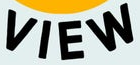

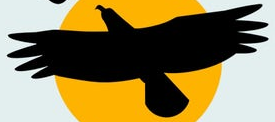

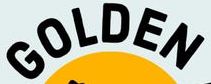

goldey



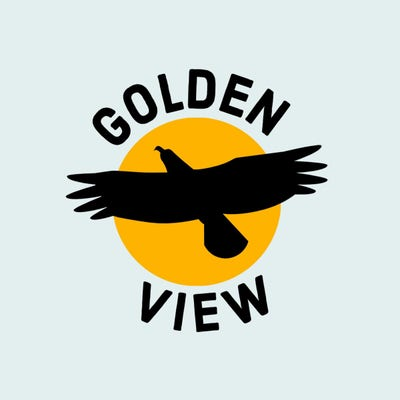

In [ ]:
import pytesseract as pt
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import os
# os.kill(os.getpid(),9)

m1 = cv2.imread("logo.jpg",1)

# 必須先框選字體所在的輪廓
m2 = cv2.inRange(m1,(0,0,0),(35,35,35))
m2 = cv2.dilate(m2, np.ones((10,15)))

p,t = cv2.findContours(
    m2,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_NONE
)
for i in range(0,len(p),1):
    x,y,w,h = cv2.boundingRect(p[i])
    cv2_imshow(m1[y:y+h,x:x+w])
    d = pt.image_to_string(m1[y:y+h,x:x+w],"eng")
    print(d)

cv2_imshow(m1)



In [ ]:
# 執行訓練程式
!python training.py

# 用小畫家繪製字型的圖片（字型大小在16-20pt之間）
# 執行程式後將box下載並修正至所要辨識目標
# 修正後將box上傳取代舊檔案

請輸入這個新語言包的名稱：myff
請輸入要學習的圖檔名稱：myff.png
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
請先確認myff.box檔案內容是否正確在按Enter鍵
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
FAIL!
APPLY_BOXES: boxfile line 3/2 ((200,310),(204,337)): FAILURE! Couldn't find a matching blob
FAIL!
APPLY_BOXES: boxfile line 4/2 ((204,310),(209,337)): FAILURE! Couldn't find a matching blob
APPLY_BOXES:
   Boxes read from boxfile:      11
   Boxes failed resegmentation:       2
   Found 9 good blobs.
Generated training data for 1 words
Extracting unicharset from box file myff.box
Wrote unicharset file unicharset
Reading myff.tr ...
Building master shape table
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances...
Stopped with 0 merged, min dist 999.000000
Computing shape distances... 0
Stopped with 0 merged, min dist 999.000000
Computing shape distances... 0
Stopped with 0 me

In [ ]:
# 圖片辨識字型

m1 = cv2.imread("myff.png",1)
d = pt.image_to_string(m1,"myff")
print(d)

# 完善訓練需要大量樣本


123456789



In [ ]:
# 條碼一維（必須用紅外線掃描），QRcode二維（有容錯率因此可使用攝影）
!apt install libzbar-dev



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev liblqr-1-0
  liblqr-1-0-dev libmagick++-6-headers libmagick++-6.q16-7
  libmagick++-6.q16-dev libmagick++-dev libmagickcore-6-arch-config
  libmagickcore-6-headers libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickcore-6.q16-dev libmagickwand-6-headers libmagickwand-6.q16-3
  libmagickwand-6.q16-dev libpixman-1-dev librsvg2-dev libv4l-0 libv4lconvert0
  li

In [ ]:
!pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[Decoded(data=b'\xe7\x94\x9f\xe6\x97\xa5\xe5\xbf\xab\xe6\xa8\x82', type='QRCODE', rect=Rect(left=16, top=16, width=84, height=84), polygon=[Point(x=16, y=16), Point(x=16, y=100), Point(x=100, y=100), Point(x=100, y=16)], quality=1, orientation=None)]
QRCODE
Rect(left=16, top=16, width=84, height=84)
生日快樂


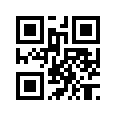

In [ ]:
# 不存在於日文的繁體中文需要編碼
from pyzbar import pyzbar

m1 = cv2.imread("q2.png",1)
data =  pyzbar.decode(m1)
print(data)
print(data[0].type)
print(data[0].rect)
try :
  print(data[0].data.decode("utf-8").encode("sjis").decode("utf-8"))
except:
  print(data[0].data.decode("utf-8"))

cv2_imshow(m1)

14
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/
QRCODE
https://www.cool3c.com/


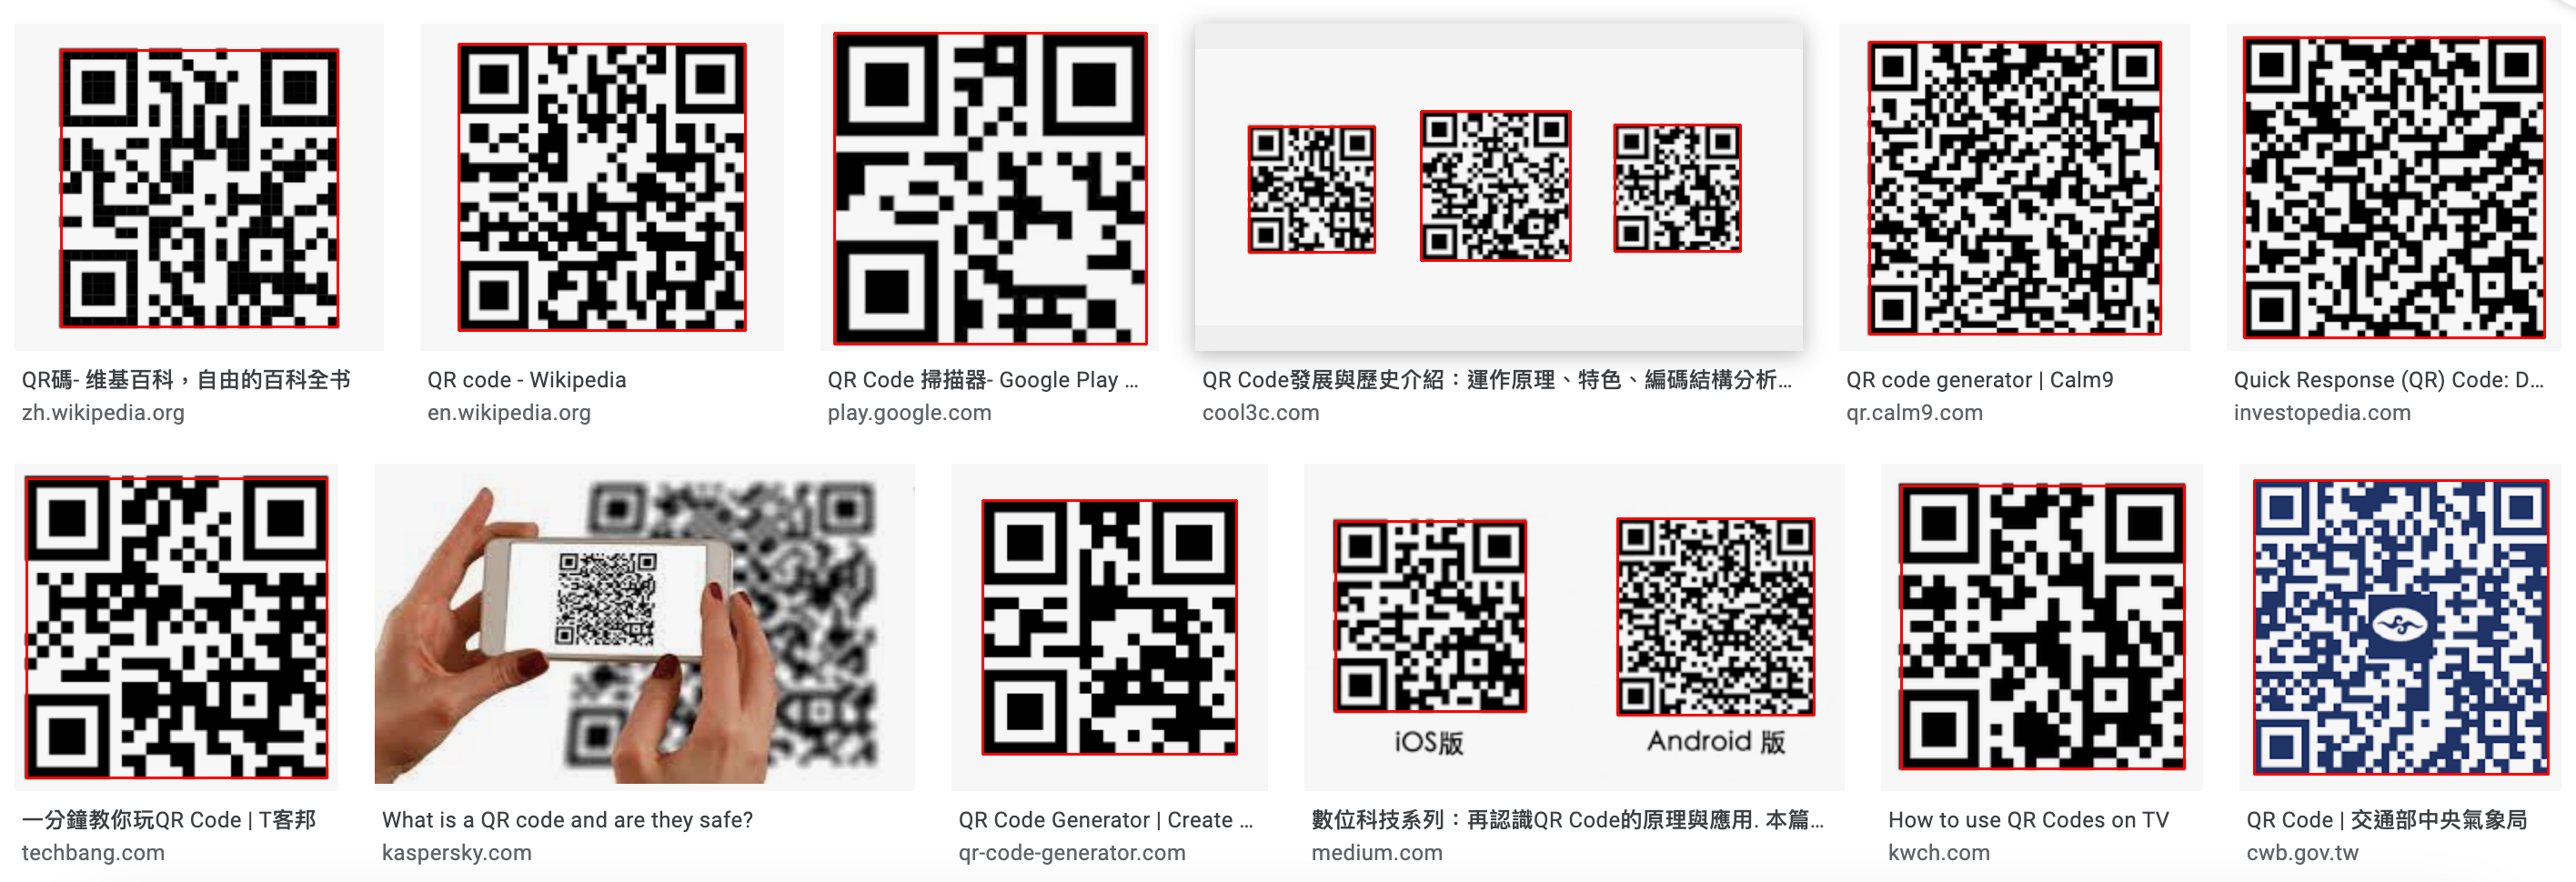

In [ ]:
# 不存在於日文的繁體中文需要編碼
from pyzbar import pyzbar

m1 = cv2.imread("q3.png",1)
data =  pyzbar.decode(m1)
print(len(data))

for i in range(0,len(data),):
  print(data[0].type)
  # print(data[0].rect)
  x,y,w,h = data[i].rect
  cv2.rectangle(m1, (x,y), (x+w, y+h), (0,0,255),2)
  try :
   print(data[0].data.decode("utf-8").encode("sjis").decode("utf-8"))
  except:
   print(data[0].data.decode("utf-8"))

cv2_imshow(m1)

[[163  33  29  29]
 [220  37  27  27]
 [ 44  40  30  30]
 [105  43  27  27]]


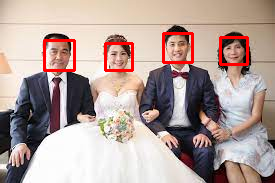

In [ ]:

m1 = cv2.imread("face.jpg",1)

p1 = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
data=p1.detectMultiScale(m1, minNeighbors=5, minSize=(10,10))
for x,y,w,h in data:
    cv2.rectangle(m1, (x,y), (x+w, y+h), (0,0,255),2)



print(data)
cv2_imshow(m1)

In [ ]:
!unzip classifier_training.zip

Archive:  classifier_training.zip
   creating: classifier_training/
   creating: classifier_training/Data/
  inflating: classifier_training/Data/Image.jpg  
   creating: classifier_training/NEG/
 extracting: classifier_training/NEG/00000.png  
  inflating: classifier_training/NEG/00001.png  
  inflating: classifier_training/NEG/00002.png  
  inflating: classifier_training/NEG/00003.png  
  inflating: classifier_training/NEG/00004.png  
  inflating: classifier_training/NEG/00005.png  
  inflating: classifier_training/NEG/00006.png  
  inflating: classifier_training/NEG/00007.png  
  inflating: classifier_training/NEG/00008.png  
 extracting: classifier_training/NEG/00009.png  
  inflating: classifier_training/NEG/00010.png  
  inflating: classifier_training/NEG/00011.png  
  inflating: classifier_training/NEG/00012.png  
  inflating: classifier_training/NEG/00013.png  
  inflating: classifier_training/NEG/00014.png  
  inflating: classifier_training/NEG/00015.png  
  inflating: classifi

In [ ]:
!python /content/classifier_training/training.py

POS/85.png
POS/2112.png
POS/256.png
POS/131.png
POS/02.png
POS/618.png
POS/77.png
POS/1717.png
POS/97.png
POS/38.png
POS/217.png
POS/5.png
POS/12.png
POS/151.png
POS/253.png
POS/51.png
POS/1557.png
POS/558.png
POS/315.png
POS/177.png
POS/1915.png
POS/219.png
POS/9.png
POS/33.png
POS/1523.png
POS/152.png
POS/1502.png
POS/1956.png
POS/2135.png
POS/822.png
POS/115.png
POS/129.png
POS/63.png
POS/188.png
POS/32.png
POS/73.png
POS/82.png
POS/92.png
POS/3.png
POS/1635.png
POS/183.png
POS/1.png
NEG/00019.png
NEG/00018.png
NEG/00016.png
NEG/00005.png
NEG/00002.png
NEG/00000.png
NEG/00008.png
NEG/00010.png
NEG/00013.png
NEG/00024.png
NEG/00014.png
NEG/00006.png
NEG/00020.png
NEG/00022.png
NEG/00001.png
NEG/00017.png
NEG/00023.png
NEG/00012.png
NEG/00021.png
NEG/00011.png
NEG/00007.png
NEG/00003.png
NEG/00015.png
NEG/00004.png
NEG/00009.png
===opencv_createsamples===
Info file name: POS.txt
Img file name: (NULL)
Vec file name: POS.vec
BG  file name: NEG.txt
Num: 42
BG color: 0
BG threshold: 80
In

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1 = cv2.imread("classifier_training/Data/IMG0100.jpg",1)

p1 = cv2.CascadeClassifier("classifier_training/xml/cascade.xml")
data= p1.detectMultiScale(m1, minNeighbors=3, minSize=(1,1))
for x,y,w,h in data:
    cv2.rectangle(m1, (x,y), (x+w, y+h), (0,0,255),2)



print(data)
cv2_imshow(m1)